#### 광고 플랫폼 별 광고비에 따른 판매량 분석
- TV광고비에 따른 판매량은 어떻게 될까?
- Radio광고비에 따른 판매량은 어떻게 될까?
- Newspaper광고비에 따른 판매량은 어떻게 될까?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

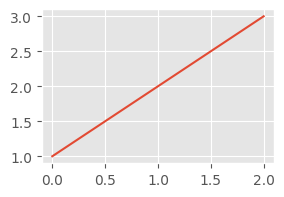

In [2]:
plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))

In [3]:
df = pd.read_csv('data/advertising.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.head() 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Axes: xlabel='TV', ylabel='Sales'>

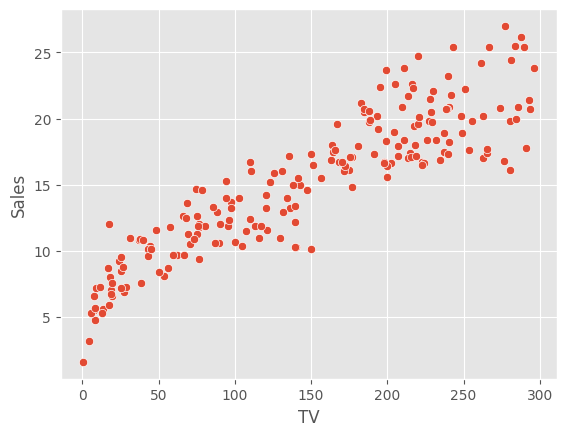

In [6]:
sns.scatterplot(data=df, x='TV', y='Sales')

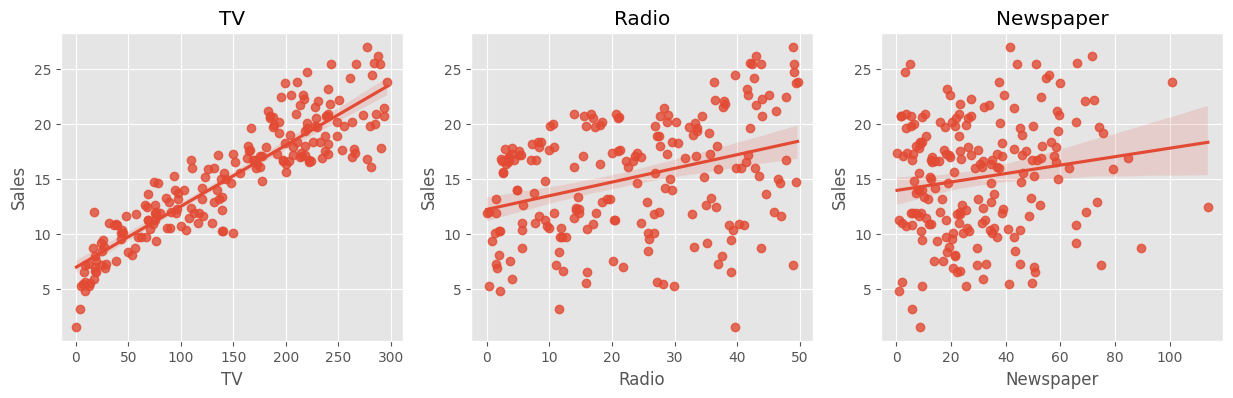

In [7]:
#매체별 광고비에 따른 판매량 시각화

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.regplot(data=df, x='TV', y='Sales')
plt.title('TV')

plt.subplot(1, 3, 2)
sns.regplot(data=df, x='Radio', y='Sales')
plt.title('Radio')

plt.subplot(1, 3, 3)
sns.regplot(data=df, x='Newspaper', y='Sales')
plt.title('Newspaper')

# plt.show()
pass

In [8]:
#상관계수 확인
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

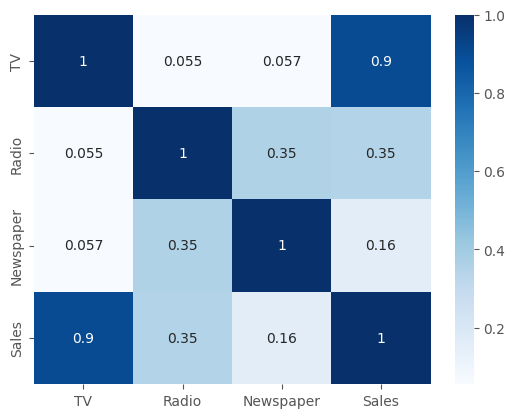

In [9]:
#히트맵 시각화

sns.heatmap(df.corr(), cmap='Blues', annot=True )
# sns.color_palette("Blues", as_cmap=True)


In [10]:
X = df[['TV']]
y = df['Sales']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 1) (50, 1) (150,) (50,)


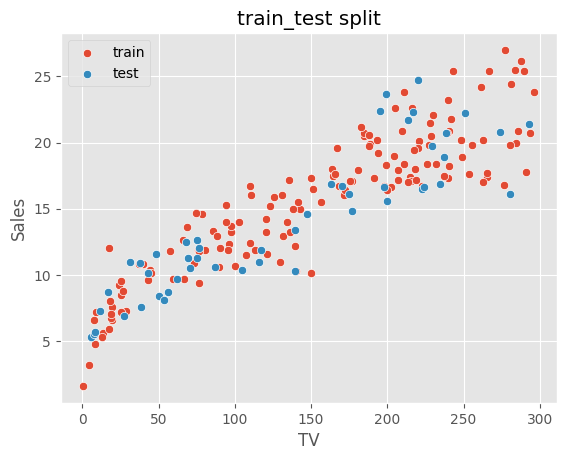

In [12]:
#훈련세트, 테스트 세트 분할 확인

sns.scatterplot(x=X_train['TV'], y=y_train, label='train')
sns.scatterplot(x=X_test['TV'], y=y_test, label='test')
plt.title("train_test split")
plt.show()

In [13]:
#모델 생성 및 훈련
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# 테스트 세트 적용해서 모델 평가하기
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

pred = model.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R2 : {r2:.2f}")


MSE : 5.51
RMSE : 2.35
MAE : 1.87
R2 : 0.80


In [15]:
#실제값과 모델 예측값 간의 비교. error의 절대값이 클수록 잘못 예측한 것임.
df_pred = pd.DataFrame( { 'X_test':X_test['TV'], 'y_test':y_test, 'y_pred':pred })
df_pred['error'] = df_pred['y_test'] - df_pred['y_pred']
df_pred.head()

,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494


In [16]:
#라이브러리를 사용하지 않고 모델의 평가점수 수동으로 계산하기.
#평가점수들은 전부 수학적 수식으로 계산되기 때문에 얼마든지 수동으로도 계산할 수 있음. 기존 라이브러리도 다음과 같은 식으로 계산하는 함수로 만들어 미리 저장해두는 식.

mae_self = abs(df_pred['error']).mean()
mse_self = np.square(df_pred['error']).mean()
rmse_self = np.sqrt(mse_self)

rss = np.square(df_pred['y_test'] - df_pred['y_pred']).sum()
tss = np.square(df_pred['y_test'] - df_pred['y_pred'].mean()).sum()
r2_self = 1 - (rss/tss)

print(f"self MSE : {mse_self:.2f}")
print(f"self RMSE : {rmse_self:.2f}")
print(f"self MAE : {mae_self:.2f}")
print(f"self R2 : {r2_self:.2f}")

self MSE : 5.51
self RMSE : 2.35
self MAE : 1.87
self R2 : 0.80


In [17]:
print(f"회귀계수: {model.coef_}")
print(f'절편: {model.intercept_}')
print(f'회귀식: {model.coef_[0]} TV + {model.intercept_}')

회귀계수: [0.05538653]
절편: 7.098853680118275
회귀식: 0.05538653085519158 TV + 7.098853680118275


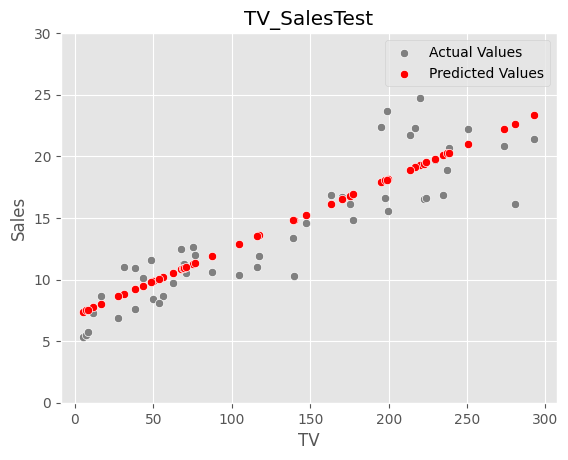

In [18]:
# 테스트데이터 실제값과 예측값 확인
sns.scatterplot(x=X_test['TV'], y=y_test, color='gray', label='Actual Values')# 테스트데이터 실제값
sns.scatterplot(x=X_test['TV'], y=pred, color='red', label='Predicted Values') # 테스트데이터 예측값
plt.xlabel('TV')
plt.ylim(0,30)
plt.title('TV_SalesTest')
plt.show()

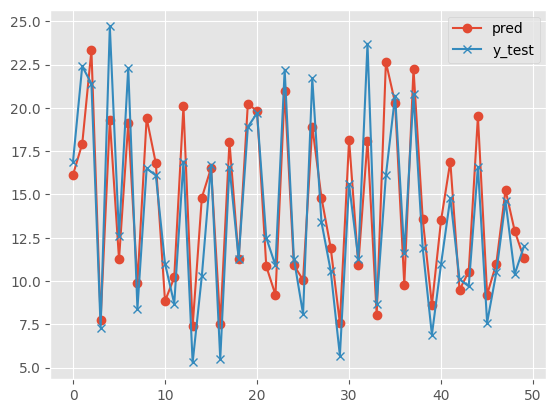

In [19]:
# 테스트데이터 실제값과 예측값 확인
plt.plot(pred, marker='o', label='pred')
plt.plot(np.array(y_test), marker='x', label='y_test')
plt.legend()

In [20]:
tv = 100
print(f"TV 광고비 : {tv}")

#예측 함수를 사용해서 예측하기
print(model.predict([[tv]]))

#학습한 공식에 대입하기 (wx + b) -- 이건 linear regression으로 학습시켰으니까 1차 함수 형태.
print(model.coef_ * tv + model.intercept_)


TV 광고비 : 100
[12.63750677]
[12.63750677]


c:\Users\jooeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
X2 = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

<Axes: >

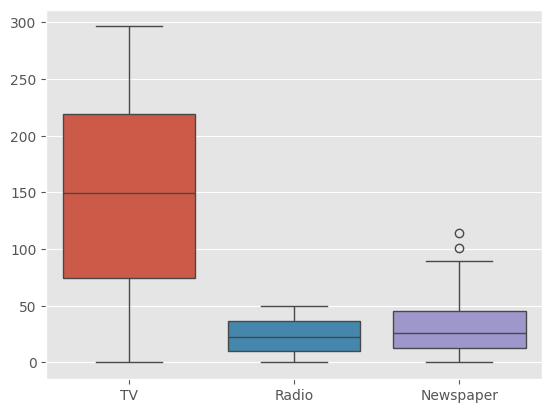

In [23]:
sns.boxplot(X2)

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler2 = MinMaxScaler()
# scaler.fit(x2)|
# X2_scaled = scaler.transform(x2)
# 원래는 이런 식으로 scaling 한 뒤에 transform을 시켜주는데, 한번에 하는 함수가 존재하므로 그걸 사용함.
X2_scaled = scaler.fit_transform(X2)

scaled_TV = X2_scaled[:,0]
scaled_Radio = X2_scaled[:,1]
scaled_Newspaper = X2_scaled[:,2]

print(f'스케일링 된 각 변수의 평균 : {scaled_TV.mean()}, {scaled_Radio.mean()}, {scaled_Newspaper.mean()}')
print(f'스케일링 된 각 변수의 표준편차 :{scaled_TV.std()}, {scaled_Radio.std()}, {scaled_Newspaper.std()}')

스케일링 된 각 변수의 평균 : 1.2212453270876723e-16, -4.529709940470639e-16, 2.220446049250313e-16
스케일링 된 각 변수의 표준편차 :1.0, 1.0, 0.9999999999999999


In [26]:
# 훈련세트, 테스트세트 분할
X_train, X_test, y_train, y_test = train_test_split(X2_scaled, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


In [27]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [28]:
# 테스트데이터로 예측
pred =model2.predict(X_test)

 # 모델 평가
mse=mean_squared_error(y_test, pred)
rmse=root_mean_squared_error(y_test, pred)
mae=mean_absolute_error(y_test, pred)
r2 =r2_score(y_test, pred)

print('===다중회귀 모델의 평가결과===')
print(f'MSE:{mse:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'MAE:{mae:.2f}')
print(f'R2:{r2:.2f}')

===다중회귀 모델의 평가결과===
MSE:2.40
RMSE:1.55
MAE:1.12
R2:0.91


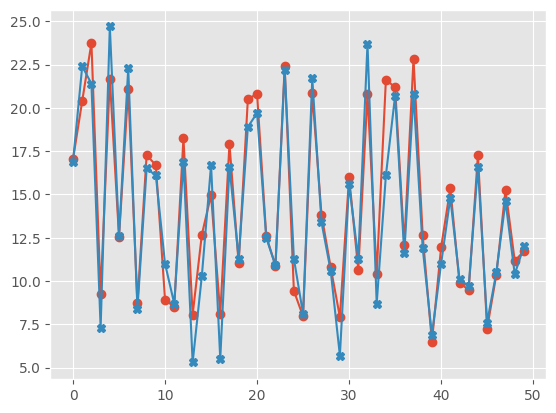

In [30]:
plt.plot(pred, marker='o', label='pred')
plt.plot(np.array(y_test), marker='X', label='pred')

In [34]:
print(f"회귀계수: {model2.coef_}")
print(f'절편: {model2.intercept_}')

# 회귀계수들
w1 = model2.coef_[0]
w2 = model2.coef_[1]
w3 = model2.coef_[2]

#절편
b = model2.intercept_

#회귀식. y = wx + b
print(f'회귀식: {w1} * tv + {w2} * radio + {w3} * newspaper + {b}')

회귀계수: [4.67709227 1.4774023  0.09352121]
절편: 15.22473459736965
회귀식: 4.677092268978724 * tv + 1.4774023036363388 * radio + 0.0935212124232997 * newspaper + 15.22473459736965


In [38]:
# 현재 데이터(X)가 StandardScaler(표준화) 되어있기 때문에 predict에 넣으려면, 넣으려는 데이터도 스케일링이 되어야 함.
# 이때, 모델 학습에 넣었던 데이터와 동일한 스케일링 방식을 사용해야 일관성을 유지하면서 올바른 예측이 가능해짐.

new_data = [[175, 15, 2]]
new_data_scaled = scaler.transform(new_data)
print(model2.predict(new_data_scaled))

# 회귀식을 이용해, 값을 대입하여 예측하는 방식
print(f'{w1 * new_data_scaled[0,0] + w2 * new_data_scaled[0,1] + w3 * new_data_scaled[0,2] + b}')

[15.80426509]
15.804265090536152


c:\Users\jooeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
# 다항식 조합 생성
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X2)
print(f'특성의 크기 : {X_poly.shape}')

# 스케일링
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# 훈련련세트, 테스트세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 모델 생성 및 학습
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

# 평가
print(f'train score : {model_poly.score(X_train, y_train)}')
print(f'test score : {model_poly.score(X_test, y_test)}')

특성의 크기 : (200, 10)
(150, 10) (50, 10) (150,) (50,)
train score : 0.9276607239475623
test score : 0.9485618659991301


In [ ]:
# 다항식 조합 생성
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9)
X_poly = poly.fit_transform(X2)
print(f'특성의 크기 : {X_poly.shape}')

# 스케일링
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# 훈련련세트, 테스트세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 모델 생성 및 학습
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

# 평가
print(f'train score : {model_poly.score(X_train, y_train)}')
print(f'test score : {model_poly.score(X_test, y_test)}')

특성의 크기 : (200, 220)
(150, 220) (50, 220) (150,) (50,)
train score : 1.0
test score : -14619695.462740216


In [42]:
poly = PolynomialFeatures(degree=9)
X_ploy = poly.fit_transform(X2)
print(X_ploy.shape)

# 스케일링
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_ploy)

# 훈련세트, 테스트세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 모델 생성 및 학습
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha = 10) # alpha : 규제강도
model_ridge.fit(X_train, y_train)

# 평가
print(f'train score : {model_ridge.score(X_train, y_train)}')
print(f'train score : {model_ridge.score(X_test, y_test)}')

(200, 220)
(150, 220) (50, 220) (150,) (50,)
train score : 0.9216197291137791
train score : 0.9444737903022632
